In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score , recall_score
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/IRIS.csv")
print(df)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [2]:
scaler=StandardScaler()
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

print(x)
print('\n',y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: o

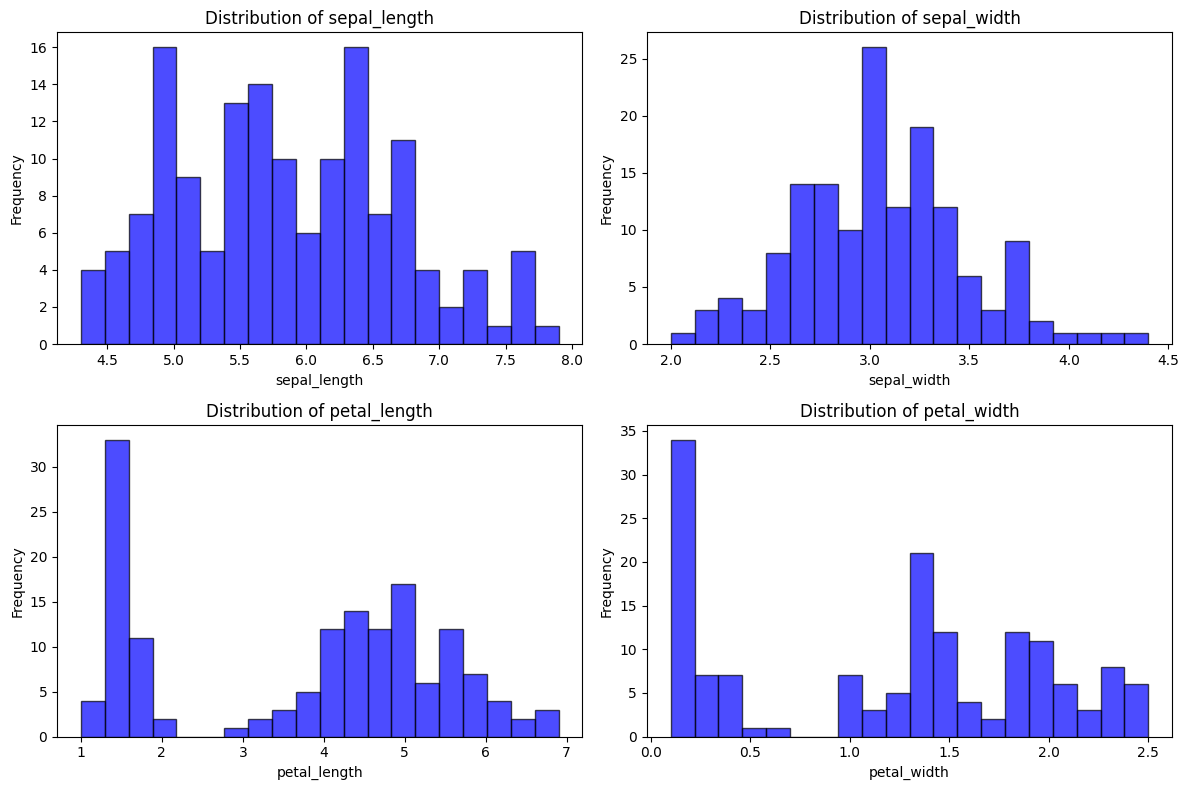

In [3]:

features = df.columns[:-1]  # All columns except the target
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  # Adjust subplot layout for the number of features
    plt.hist(df[feature], bins=20, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [4]:
x_train , x_test , y_train , y_test =train_test_split(x,y,test_size=0.2,random_state=42)
z=x_train
w=x_test
x_train_standard=scaler.fit_transform(x_train)
x_test_standard=scaler.transform(x_test)

x_train=pd.DataFrame(x_train_standard,columns=z.columns)
x_test=pd.DataFrame(x_test_standard,columns=w.columns)

model=RandomForestClassifier(n_estimators=1,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)
recall=recall_score(y_test,y_pred,average='micro')
precision=precision_score(y_test,y_pred,average='micro')
f1=f1_score(y_test,y_pred,average='micro')

print("Accuracy:",accuracy*100)
print("Confusion Matrix:\n",confusion*100)
print("Recall:",recall*100)
print("Precision:",precision*100)
print("F1 Score:",f1*100)

Accuracy: 100.0
Confusion Matrix:
 [[1000    0    0]
 [   0  900    0]
 [   0    0 1100]]
Recall: 100.0
Precision: 100.0
F1 Score: 100.0


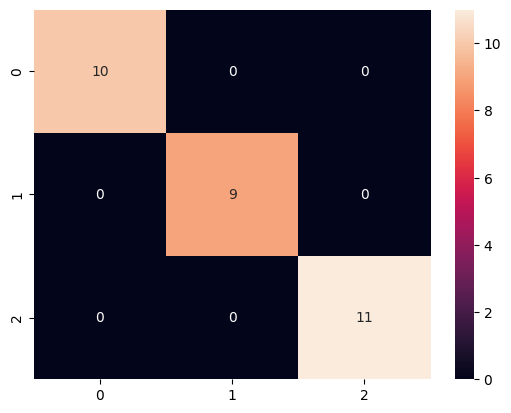

In [5]:
plot = confusion_matrix(y_test, y_pred)
sns.heatmap(plot, annot=True)
plt.show()

In [7]:
input={'sepal_length':[5.1],
       'sepal_width':[3.5],
       'petal_length':[1.4],
       'petal_width':[0.2]}
input_df=pd.DataFrame(input)
input_data=scaler.transform(input_df)
input_data_df=pd.DataFrame(input_data , columns=input_df.columns)
prediction=model.predict(input_data_df)
print(prediction[0])

Iris-setosa


In [8]:
import joblib

In [9]:
joblib.dump(model, 'linear_regression_model.pkl')
print("Model saved successfully.")

Model saved successfully.
